In [37]:
# import libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt
import pygal
from pygal.style import Style
from IPython.display import SVG, display
import plotly.graph_objects as go
from plotly.subplots import make_subplots

#Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date']   = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [38]:
# Filter for Data Analyst roles in the US
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')]

# Filter for Data Analyst roles in the Canada
df_DA_CA = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Canada')]

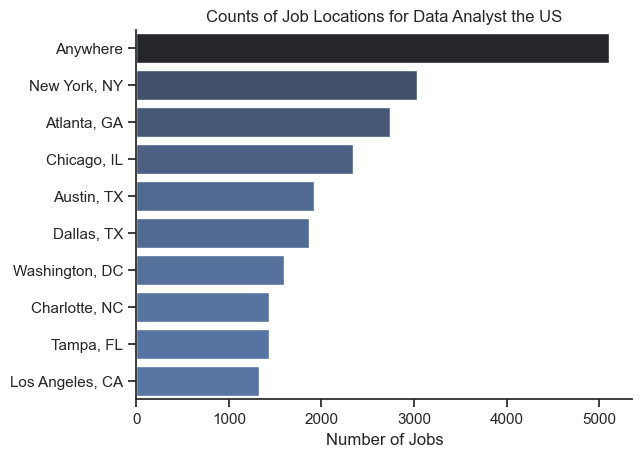

In [39]:
df_plot = df_DA_US['job_location'].value_counts().sort_values(ascending = False).head(10).to_frame()

sns.set_theme(style="ticks")
# Plotting the top 10 job locations for Data Analysts in the US
sns.barplot(data=df_plot, x='count', y= 'job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

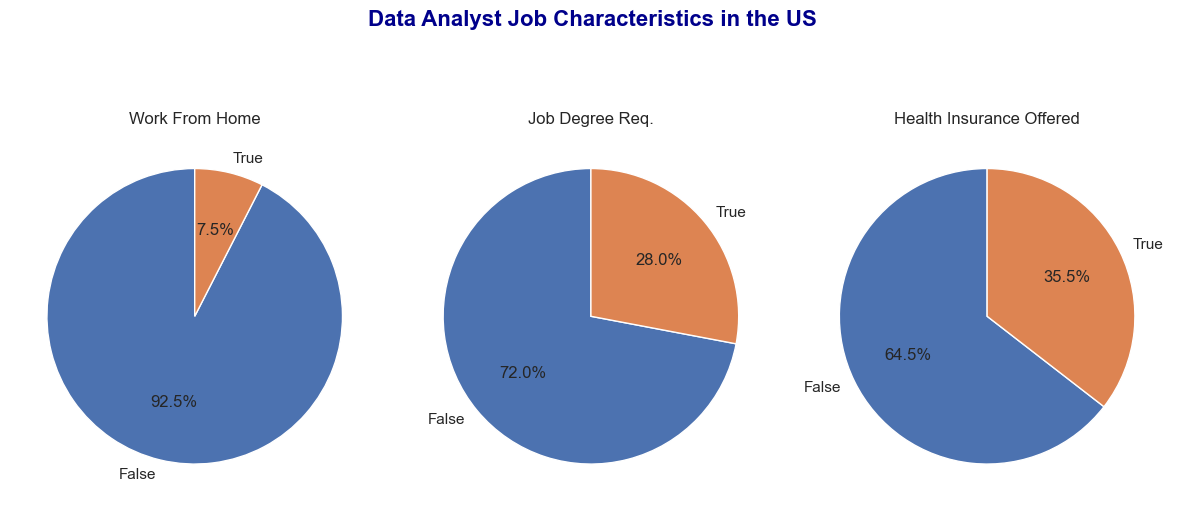

In [40]:
dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), 
              labels=df_DA_US[column].value_counts().index, 
              autopct='%1.1f%%', 
              startangle=90)
    ax[i].set_title(title)

# Use fig.suptitle instead of plt.title
fig.suptitle('Data Analyst Job Characteristics in the US', fontsize=16, fontweight='bold', color='darkblue', y=1.05)

# Adjust layout to leave space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [41]:
# Define column mapping
dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create 1 row, 3 column subplot for pie charts
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}]*3],
                    subplot_titles=list(dict_column.values()))

# Loop through columns and add pie charts
for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_US[column].value_counts()
    fig.add_trace(
        go.Pie(
            labels=value_counts.index.astype(str),
            values=value_counts.values,
            hole=0.4,  # donut chart
            textinfo='percent+label'
        ),
        row=1,
        col=i+1
    )

# Add a global title
fig.update_layout(
    title_text="Data Analyst Job Characteristics in the US",
    title_font=dict(size=18, color='darkblue'),
    title_x=0.5,
    showlegend=False,
    height=500,
    width=1000
)

fig.show()


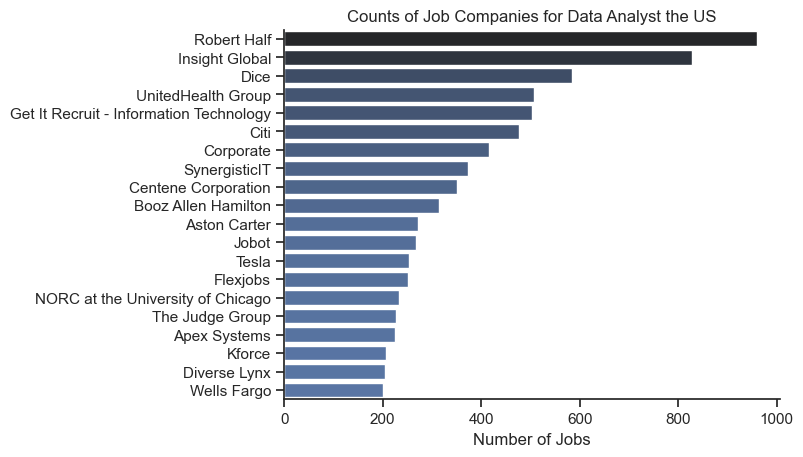

In [42]:
df_plot = df_DA_US['company_name'].value_counts().sort_values(ascending = False).head(20).to_frame()

sns.set_theme(style="ticks")
# Plotting the top 10 job locations for Data Analysts in the US
sns.barplot(data=df_plot, x='count', y= 'company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Companies for Data Analyst the US')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

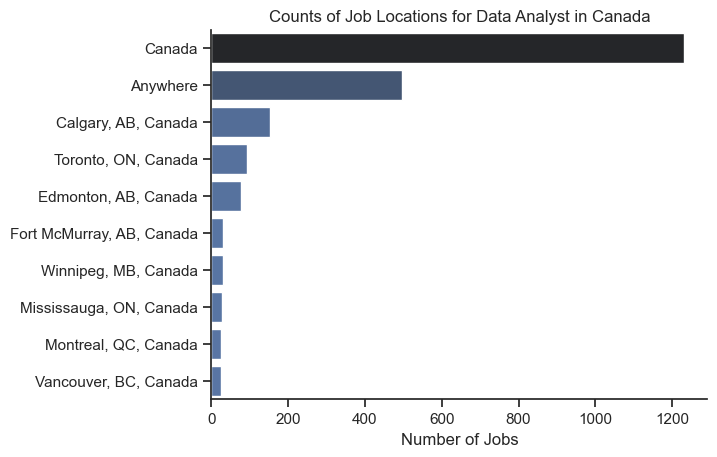

In [43]:
df_plot_c = df_DA_CA['job_location'].value_counts().sort_values(ascending = False).head(10).to_frame()

sns.set_theme(style="ticks")
# Plotting the top 10 job locations for Data Analysts in Canada
sns.barplot(data=df_plot_c, x='count', y= 'job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Locations for Data Analyst in Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

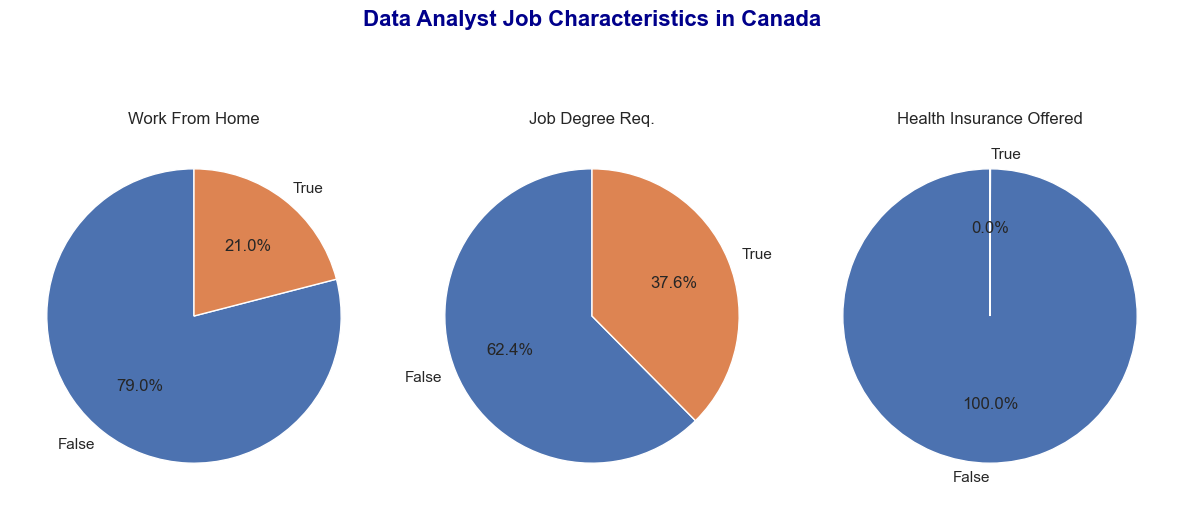

In [44]:
dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches(12, 5)

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_CA[column].value_counts(), 
              labels=df_DA_CA[column].value_counts().index, 
              autopct='%1.1f%%', 
              startangle=90)
    ax[i].set_title(title)

# Use fig.suptitle instead of plt.title
fig.suptitle('Data Analyst Job Characteristics in Canada', fontsize=16, fontweight='bold', color='darkblue', y=1.05)

# Adjust layout to leave space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [45]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Define column mapping
dict_column = {
    'job_work_from_home': 'Work From Home',
    'job_no_degree_mention': 'Job Degree Req.',
    'job_health_insurance': 'Health Insurance Offered'
}

# Create 1 row, 3 column subplot for pie charts
fig = make_subplots(rows=1, cols=3, specs=[[{'type':'domain'}]*3],
                    subplot_titles=list(dict_column.values()))

# Loop through columns and add pie charts
for i, (column, title) in enumerate(dict_column.items()):
    value_counts = df_DA_CA[column].value_counts()
    fig.add_trace(
        go.Pie(
            labels=value_counts.index.astype(str),
            values=value_counts.values,
            hole=0.4,  # donut chart
            textinfo='percent+label'
        ),
        row=1,
        col=i+1
    )

# Add a global title
fig.update_layout(
    title_text="Data Analyst Job Characteristics in the US",
    title_font=dict(size=18, color='darkblue'),
    title_x=0.5,
    showlegend=False,
    height=500,
    width=1000
)

fig.show()


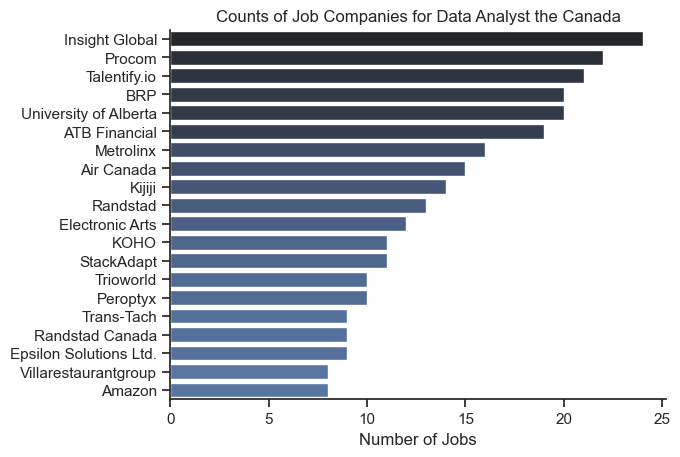

In [46]:
df_plot = df_DA_CA['company_name'].value_counts().sort_values(ascending = False).head(20).to_frame()

sns.set_theme(style="ticks")
# Plotting the top 10 job locations for Data Analysts in the US
sns.barplot(data=df_plot, x='count', y= 'company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Counts of Job Companies for Data Analyst the Canada')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()